## Part 3 Loading Data & EDA

Import relevant packages for the following parts

In [1]:
import numpy as np
import pandas as pd
import math
import re
import sys

from gensim.models.word2vec import Word2Vec

import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

plt.style.use('ggplot')
from preprocessing import get_processed_data
import csv

### Import data cleaned by using the selfwritten preprocessing module

In [2]:
moria_df_loaded=get_processed_data('moria-data')


loading files...
C:\Users\nikodemicek\Documents\GitHub\refugee_project/../../../CBS - Copenhagen Business School/Kick-Ass Master Thesis - General/Data/moria-data/Raw Data/
Reading file: C:\Users\nikodemicek\Documents\GitHub\refugee_project/../../../CBS - Copenhagen Business School/Kick-Ass Master Thesis - General/Data/moria-data/Raw Data\Sheet 1.csv
Reading file: C:\Users\nikodemicek\Documents\GitHub\refugee_project/../../../CBS - Copenhagen Business School/Kick-Ass Master Thesis - General/Data/moria-data/Raw Data\Sheet 10.csv
Reading file: C:\Users\nikodemicek\Documents\GitHub\refugee_project/../../../CBS - Copenhagen Business School/Kick-Ass Master Thesis - General/Data/moria-data/Raw Data\Sheet 2.csv
Reading file: C:\Users\nikodemicek\Documents\GitHub\refugee_project/../../../CBS - Copenhagen Business School/Kick-Ass Master Thesis - General/Data/moria-data/Raw Data\Sheet 3.csv
Reading file: C:\Users\nikodemicek\Documents\GitHub\refugee_project/../../../CBS - Copenhagen Business Scho

In [3]:
#to avoid reloading and preprocessing data
moria_df = moria_df_loaded.copy()

# reset index
moria_df.reset_index(drop=True, inplace=True)
#maybe we should keep the one with highest Reach? or other metric?
moria_df.sort_values(by='Reach',ascending=False,ignore_index=True, inplace=True)

moria_df.shape
#moria_df.head()

(188728, 32)

In [4]:

#remove all duplicate tweets (should be in preprocessing file?)
moria_df.drop_duplicates(subset ="Tweet Raw", inplace = True) 
moria_df.shape




(56898, 32)

In [5]:
moria_df["Tweet Clean"].value_counts()

rt   hi  euhomeaffairs  interieur gouv  bmi bund  ministeriejenv  ukhomeoffice  moria has burned down   this humanitarian catastrophe calls for urgent action  relocate refugees from camps on the greek islands before further tragedies happen   refugeeswelcome  leavenoonebehind                                                                                                                                                                                                                                                                                112
moria migrants  fire destroys greece s camp on lesbos                                                                                                                                                                                                                                                                                                                                                                                                           

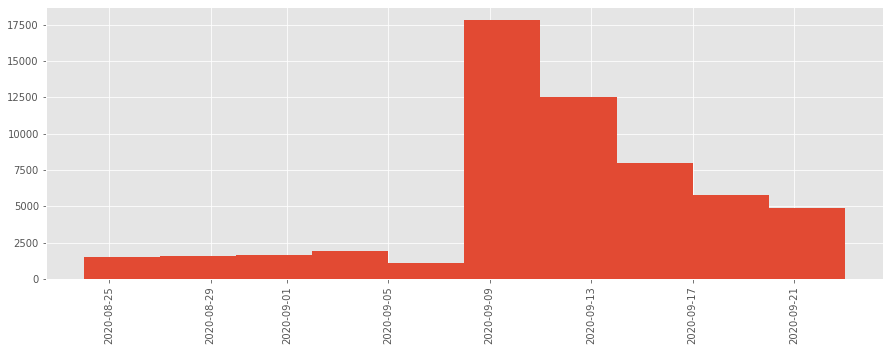

In [6]:

#type(contents)

#set short date as index
moria_df['Date Short'] = pd.to_datetime(moria_df['Date Short'])
moria_df = moria_df.set_index(moria_df['Date Short'])
moria_df = moria_df.sort_index()

#moria_df['Date Short'].sort_values()
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)

moria_df['Date Short'].hist()

In [7]:
event_date = '2020-09-08'


# create train test partition
pre_event = moria_df[:event_date]
post_event  = moria_df[event_date:]


#pre_event = moria_df.loc(moria_df['Date Short'] < event_date)
#post_event = moria_df.loc(moria_df['Date Short']>= event_date)

print('Pre event tweets: ',pre_event.shape[0])
print('Post event tweets: ',post_event.shape[0])


Pre event tweets:  8343
Post event tweets:  49055


In [8]:

#pre_event.info()
pre_event.sort_values(by='Reach',ascending=False,ignore_index=True)
#post_event['Reach'].sort_values()

#pre_event.head(10)

,Date,URL,Tweet Raw,Influencer,Country,Language,Reach,Engagement,AVE,Sentiment,...,Time,State,City,Hashtags,Mentions,Linked Content,Retweet,Quote Tweet,Tweet Clean,Tweet Clean Tokens
0,02-Sep-2020 03:45PM,https://twitter.com/nytimes/statuses/130115420...,Greece reported the first case of the coronavi...,@nytimes,United States,English,47230169,NaN,436879.06,Neutral,...,3:45 PM,New York,New York City,[],[],"[https://t.co/WQMXjTzjKT, https://t.co/qKob3IO...",False,False,greece reported the first case of the coronavi...,"[greece, reported, first, case, coronavirus, m..."
1,31-Aug-2020 09:58PM,https://twitter.com/BBCWorld/statuses/13005233...,"Almost 900,000 migrants arrived in Greece back...",@bbcworld,United Kingdom,English,28853971,NaN,266899.23,Neutral,...,9:58 PM,England,London,[],[bbclysedoucet],"[https://t.co/2cKYHmC4tr, https://t.co/rkAh53y...",False,False,almost migrants arrived in greece back...,"[almost, migrant, arrived, greece, back, sympa..."
2,08-Sep-2020 08:28PM,https://twitter.com/ABC/statuses/1303399711706...,A major testing and contact-tracing operation ...,@abc,United States,English,15881161,NaN,146900.74,Neutral,...,8:28 PM,New York,New York City,[],[],[https://t.co/Im6pGHULY7],False,False,a major testing and contact tracing operation ...,"[major, testing, contact, tracing, operation, ..."
3,02-Sep-2020 04:18PM,https://twitter.com/ABC/statuses/1301162532984...,LATEST: Greece announces it is imposing a two-...,@abc,United States,English,15870455,NaN,146801.71,Neutral,...,4:18 PM,New York,New York City,[],[],[https://t.co/Ivp2goh2e6],False,False,latest greece announces it is imposing a two ...,"[latest, greece, announces, imposing, week, lo..."
4,08-Sep-2020 03:27PM,https://twitter.com/AP/statuses/13033239768574...,RT @AP_Europe: A major testing and contact-tra...,@ap,Unknown,English,14408559,NaN,133279.17,Neutral,...,3:27 PM,NaN,NaN,[],[AP_Europe],[https://t.co/hhRmMkNdd2],True,False,rt a major testing and contact tracing opera...,"[major, testing, contact, tracing, operation, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8338,31-Aug-2020 01:51AM,https://twitter.com/nfourtakas/statuses/130021...,@oruchandemirci @tomyork5 @AveeCaaesar Your di...,@nfourtakas,Unknown,English,1,NaN,0.01,Negative,...,1:51 AM,NaN,NaN,[],"[oruchandemirci, tomyork5, AveeCaaesar]",[],False,False,oruchandemirci tomyork aveecaaesar your di...,"[oruchandemirci, tomyork, aveecaaesar, dirty, ..."
8339,02-Sep-2020 11:00PM,http://twitter.com/Canbr8/statuses/13012637046...,QT @Name1Pls: #Europe #France #Germany #Englan...,@Canbr8,Unknown,English,1,0.0,0.01,Neutral,...,11:00 PM,NaN,NaN,"[Europe, France, Germany, England, Belgium, Ne...",[Name1Pls],[https://t.co/TXvBmcijje],False,True,qt europe france germany england belgiu...,"[europe, france, germany, england, belgium, ne..."
8340,03-Sep-2020 07:44AM,https://twitter.com/EmmanuelEricks7/statuses/1...,"Over 10,000 migrants stopped from entering Gre...",@emmanuelericks7,Unknown,English,1,NaN,0.01,Neutral,...,7:44 AM,NaN,NaN,[],[],[https://t.co/0D7Dr7X5ke],False,False,over migrants stopped from entering gre...,"[migrant, stopped, entering, greece, year]"
8341,29-Aug-2020 09:40PM,https://twitter.com/moon44_star/statuses/12997...,@slmcnm__ @thesspeter0 @izmirliseyfi1 @Epeisod...,@moon44_star,Unknown,English,1,NaN,0.01,Neutral,...,9:40 PM,NaN,NaN,"[greece, turkey, europa]","[slmcnm__, thesspeter0, izmirliseyfi1, Epeisod...",[],False,False,slmcnm thesspeter izmirliseyfi epeisod...,"[slmcnm, thesspeter, izmirliseyfi, epeisodiaon..."


Also delete duplicate tweets. 

---

### EDA

what features can we do:
length of tweet (words, characters) (int)
length of cleaned tweet (words) (int)
hashtags used (list)
no. of hashtags (int)


In [9]:
pd.set_option('display.max_colwidth',None)
print(moria_df['Tweet Raw'].loc[[10]])
print(moria_df['Tweet Clean'].loc[[10]])

KeyError: "None of [DatetimeIndex(['1970-01-01 00:00:00.000000010'], dtype='datetime64[ns]', name='Date Short', freq=None)] are in the [index]"

In [10]:
from wordcloud import WordCloud

def get_wordcloud(df):
    #collocations = including bigrams
    cloud = WordCloud(background_color='white',
                      collocations = False, 
                      width=1600, 
                      height=800).generate(' '.join(df['Tweet Clean']))
    plt.figure(figsize=(20,10))
    plt.imshow(cloud)
    plt.axis('off')
    return plt.show()





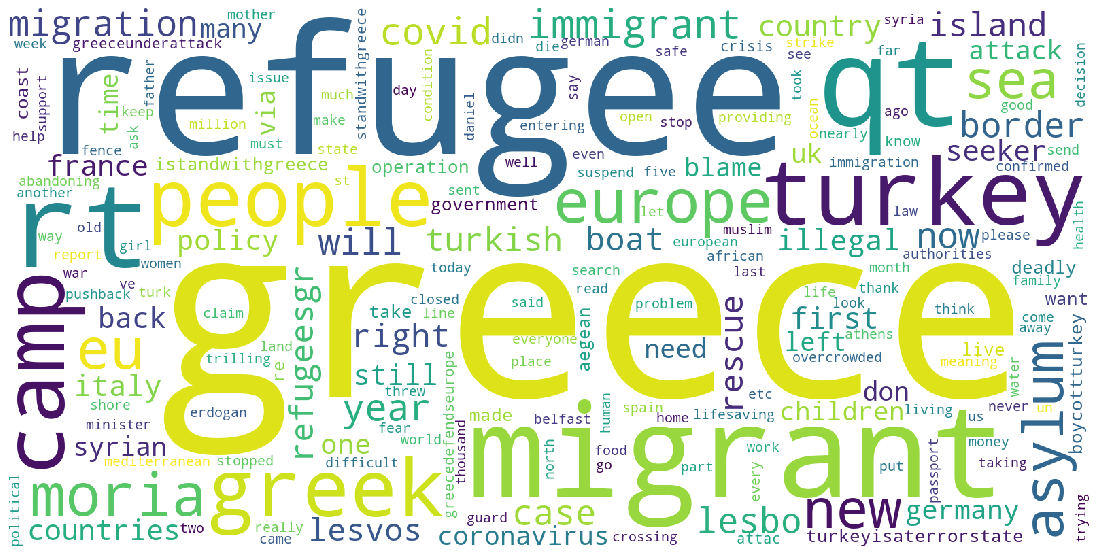

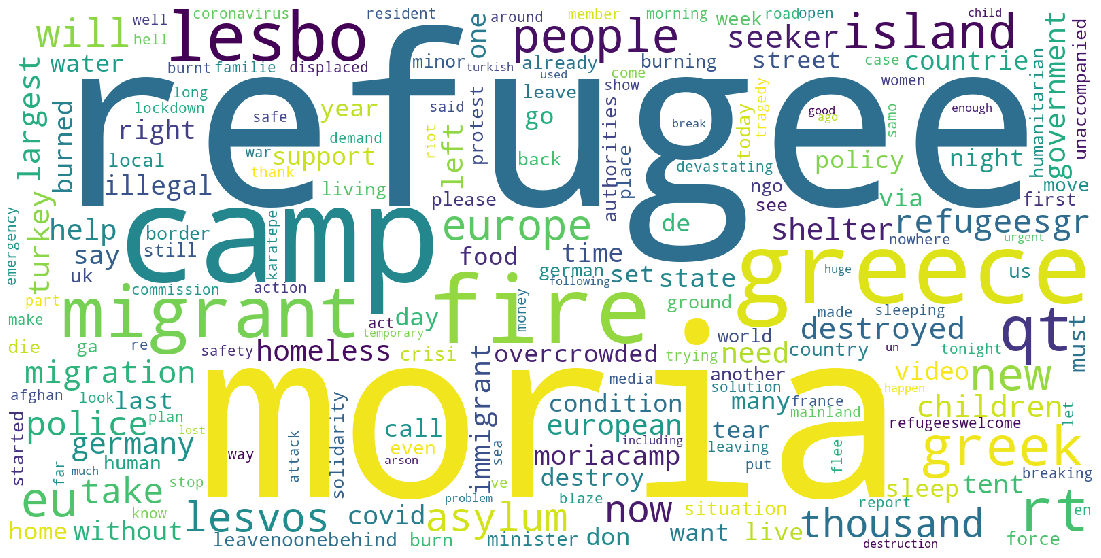

In [11]:
get_wordcloud(pre_event)

get_wordcloud(post_event)

In [12]:
import seaborn as sns

def bar_chart(dfSeries):
    plt.figure(figsize=(12,6))
    ax = dfSeries.value_counts().plot(kind = 'bar')
    for p in ax.patches:
        ax.annotate(str(round(p.get_height()/dfSeries.shape[0]*100,2))+'%', (p.get_x()+0.2, p.get_height() * 0.5))


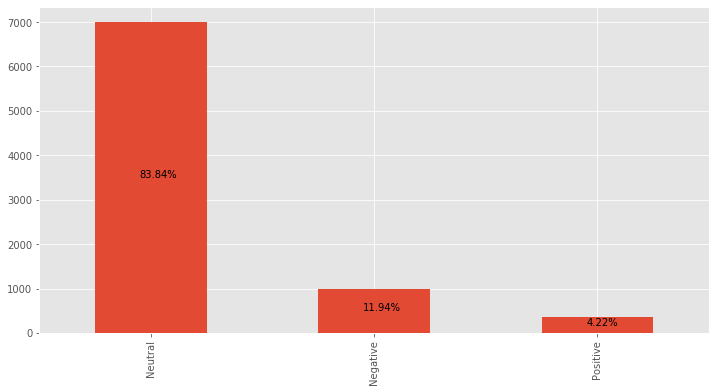

In [13]:
#we should make our own sentiment analysis

bar_chart(pre_event.Sentiment)

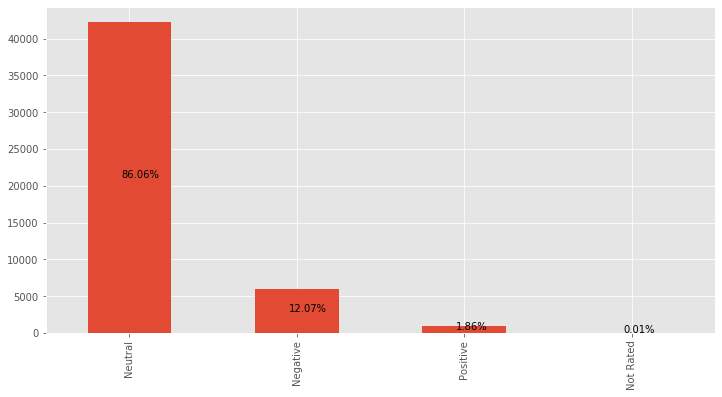

In [14]:
bar_chart(post_event.Sentiment)

In [15]:
moria_df["Country"].value_counts()

Unknown           23946
United Kingdom     5924
United States      5788
Greece             4406
Germany            2111
                  ...  
Gabon                 1
Aruba                 1
Vanuatu               1
Guinea-Bissau         1
Kiribati              1
Name: Country, Length: 193, dtype: int64

In [16]:
moria_df['Reach'].describe()


count    5.689800e+04
mean     8.511577e+04
std      1.205236e+06
min      1.000000e+00
25%      1.810000e+02
50%      1.021000e+03
75%      4.168000e+03
max      5.865150e+07
Name: Reach, dtype: float64

In [17]:
print('Mean reach:',round(moria_df["Reach"].mean(),2))
print('Median reach:',moria_df["Reach"].median())
print('Max reach:', max(moria_df["Reach"]))

Mean reach: 85115.77
Median reach: 1021.0
Max reach: 58651497


Number of Unique Reach: 13611
Reach Median: 1021.0
count    5.689800e+04
mean     8.511577e+04
std      1.205236e+06
min      1.000000e+00
25%      1.810000e+02
50%      1.021000e+03
75%      4.168000e+03
max      5.865150e+07
Name: Reach, dtype: float64


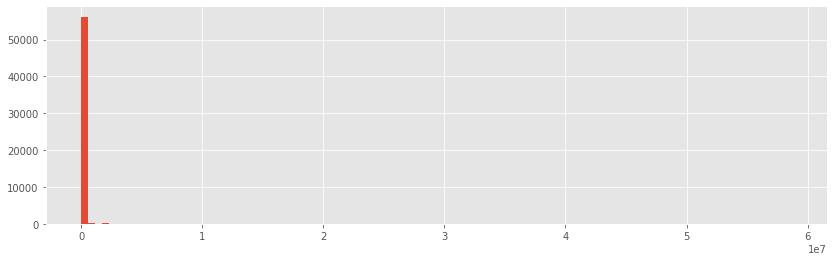

In [18]:
def plot_hist(measure = 'Reach'):
    print("Number of Unique {}: {}".format(measure, str(len(moria_df[measure].unique()))))
    print("{} Median: {}".format(measure, str(moria_df[measure].median())))
    print(moria_df[measure].describe())
    plt.figure(figsize=(14,4))
    plt.hist(moria_df[measure], bins = 100)
    plt.show()

    
plot_hist()

https://benlevyx.github.io/twitter-polling/eda/

have a similar chart but display how the sentiment/topics (or mixture = combined chart) changes over time (instead of no. of likes)

heatmap for tweets that have several topics, or in overall the correlation of events



# Word2Vec part

In [19]:
pre_event["Tweet Clean Tokens"]

Date Short
2020-08-24                                                                                                                                                                                                             [boiarchy, cynaegeirus, dead, purged, greece, applying, asylum]
2020-08-24                                              [blacklivesmatter, also, alllivesmatter, shame, true, greece, found, secretly, expelled, refugee, recent, month, abandoning, many, around, border, greek, territorial, water, humanrightsviolations, refugee, unhumanrightseu]
2020-08-24                                                                                      [shame, true, greece, found, secretly, expelled, refugee, recent, month, abandoning, many, around, border, greek, territorial, water, humanrightsviolations, refugee, unhumanrightseu]
2020-08-24                                                                                                                                              

In [42]:
from gensim.models import Word2Vec

#pre_event["Tweet Clean Tokens"]


model1 = Word2Vec(sentences=pre_event["Tweet Clean Tokens"],size = 200, window=5)

In [30]:
model1.wv.vocab


{'cynaegeirus': <gensim.models.keyedvectors.Vocab at 0x18a82cd1988>,
 'dead': <gensim.models.keyedvectors.Vocab at 0x18a82cd1188>,
 'greece': <gensim.models.keyedvectors.Vocab at 0x18a82b8c688>,
 'applying': <gensim.models.keyedvectors.Vocab at 0x18a82b8bb48>,
 'asylum': <gensim.models.keyedvectors.Vocab at 0x18a82b8b488>,
 'blacklivesmatter': <gensim.models.keyedvectors.Vocab at 0x18a82b8bac8>,
 'also': <gensim.models.keyedvectors.Vocab at 0x18a82b8b9c8>,
 'shame': <gensim.models.keyedvectors.Vocab at 0x18a82b8be08>,
 'true': <gensim.models.keyedvectors.Vocab at 0x18a82b8be88>,
 'found': <gensim.models.keyedvectors.Vocab at 0x18a82b8ba48>,
 'secretly': <gensim.models.keyedvectors.Vocab at 0x18a82b8b908>,
 'expelled': <gensim.models.keyedvectors.Vocab at 0x18a82b8b048>,
 'refugee': <gensim.models.keyedvectors.Vocab at 0x18a82b8b8c8>,
 'recent': <gensim.models.keyedvectors.Vocab at 0x18a82b8bb88>,
 'month': <gensim.models.keyedvectors.Vocab at 0x18a82b8b188>,
 'abandoning': <gensim.mode

In [48]:
model1.wv.most_similar("illegal",topn=20)

[('push', 0.9504846930503845),
 ('african', 0.9320103526115417),
 ('right', 0.9294029474258423),
 ('immigrant', 0.913203775882721),
 ('human', 0.9094990491867065),
 ('back', 0.9079995155334473),
 ('abandoning', 0.900397539138794),
 ('deflating', 0.8995095491409302),
 ('sent', 0.8985726833343506),
 ('edge', 0.8949202299118042),
 ('taking', 0.8945746421813965),
 ('dumping', 0.8925198912620544),
 ('turn', 0.8918508291244507),
 ('knowing', 0.8903266787528992),
 ('away', 0.8852874040603638),
 ('territorial', 0.8838440179824829),
 ('damn', 0.8826620578765869),
 ('leaving', 0.8784530162811279),
 ('economical', 0.8771857619285583),
 ('illegally', 0.8768181800842285)]

In [32]:
model2 = Word2Vec(sentences=post_event["Tweet Clean Tokens"],size = 200, window=5)

In [49]:
model2.wv.most_similar("illegal",topn=20)

[('alight', 0.8063045144081116),
 ('intruder', 0.7178874015808105),
 ('implementing', 0.6494954824447632),
 ('vandalizing', 0.5999311208724976),
 ('albanian', 0.5954852104187012),
 ('mnootmoe', 0.5913801193237305),
 ('destroy', 0.585578978061676),
 ('afgan', 0.5805752277374268),
 ('hybrid', 0.5790430903434753),
 ('greekfasciststate', 0.5787898302078247),
 ('smuggle', 0.5785900354385376),
 ('criminal', 0.5771886110305786),
 ('prosecuted', 0.5626615881919861),
 ('populated', 0.557345986366272),
 ('blackmail', 0.5385414361953735),
 ('diliman', 0.5385320782661438),
 ('transported', 0.5288496017456055),
 ('ungrateful', 0.527748167514801),
 ('flying', 0.5253758430480957),
 ('shouted', 0.5167948603630066)]

#words that get retweeted the most


#doc2vec on tweets, find clusters

#how word scores have changed, which words remained

#which events "trigger" each particular group the most

#Which words define groups


we could define the biased tweets (in a similar fashion as hate speech detection), then take the words occuring there (or the ones that give most weight to bias) and compare their cosine distance in pre and post event datasets to some keywords (refugee etc.)

We could do a heatmap with words in a similar way as here:

![title](https://pytorch.org/tutorials/_images/sphx_glr_seq2seq_translation_tutorial_004.png)

found on https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html

In [34]:
from gensim.models import FastText

model3 = FastText(size = 200, window = 7, min_count = 10)
model3.build_vocab(sentences = pre_event["Tweet Clean Tokens"])
model3.train(sentences = pre_event["Tweet Clean Tokens"], total_examples=len(pre_event["Tweet Clean Tokens"]),epochs = 20)

In [50]:
model3.wv.most_similar("illegal",topn=20)

[('illegals', 0.9771357178688049),
 ('legal', 0.9015030860900879),
 ('illegally', 0.8828284740447998),
 ('illegalimmigrants', 0.6752533912658691),
 ('flow', 0.6436553597450256),
 ('legally', 0.6389375925064087),
 ('attempt', 0.6224498748779297),
 ('invasion', 0.5797487497329712),
 ('cruel', 0.5548218488693237),
 ('failed', 0.5328417420387268),
 ('attempting', 0.5304227471351624),
 ('uproots', 0.5162943601608276),
 ('invade', 0.508069634437561),
 ('blackmail', 0.500586748123169),
 ('topic', 0.49168339371681213),
 ('invading', 0.49043819308280945),
 ('trafficker', 0.483929842710495),
 ('trafficking', 0.4747554063796997),
 ('probe', 0.46688875555992126),
 ('stop', 0.4653044641017914)]

In [36]:

model4 = FastText(size = 200, window = 7, min_count = 10)
model4.build_vocab(sentences = post_event["Tweet Clean Tokens"])
model4.train(sentences = post_event["Tweet Clean Tokens"], total_examples=len(post_event["Tweet Clean Tokens"]),epochs = 20)

In [51]:
model4.wv.most_similar("illegal",topn=20)

[('illegaly', 0.9418107271194458),
 ('illegale', 0.9398108720779419),
 ('illegals', 0.885044515132904),
 ('illegally', 0.839739203453064),
 ('legal', 0.6692936420440674),
 ('illegalimmigrants', 0.6688456535339355),
 ('lesboslegal', 0.6372437477111816),
 ('legally', 0.44530749320983887),
 ('legacy', 0.37687981128692627),
 ('portugal', 0.34840482473373413),
 ('criminal', 0.34732431173324585),
 ('allegedly', 0.32388168573379517),
 ('filled', 0.31578299403190613),
 ('fulfill', 0.31452396512031555),
 ('mosque', 0.311046838760376),
 ('deported', 0.30972039699554443),
 ('invaded', 0.30440422892570496),
 ('allegation', 0.30211547017097473),
 ('start', 0.30079346895217896),
 ('deport', 0.29601097106933594)]

## Doc2Vec
Tweet serves as a doc and is encoded in its entirety

In [164]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

tweets = [TaggedDocument(tweet,[i]) for i, tweet in enumerate(post_event["Tweet Clean Tokens"])]

model_tweets = Doc2Vec(tweets, vector_size = 200, min_count = 10, epochs =30)

In [165]:
#model_tweets.build_vocab(tweets)
print(model_tweets.epochs)
for i in range(model_tweets.epochs):
    model_tweets.train(tweets, total_examples=model_tweets.corpus_count,epochs=1)
    print(f"Epoch #{i+1} done.")
    


30
Epoch #1 done.
Epoch #2 done.
Epoch #3 done.
Epoch #4 done.
Epoch #5 done.
Epoch #6 done.
Epoch #7 done.
Epoch #8 done.
Epoch #9 done.
Epoch #10 done.
Epoch #11 done.
Epoch #12 done.
Epoch #13 done.
Epoch #14 done.
Epoch #15 done.
Epoch #16 done.
Epoch #17 done.
Epoch #18 done.
Epoch #19 done.
Epoch #20 done.
Epoch #21 done.
Epoch #22 done.
Epoch #23 done.
Epoch #24 done.
Epoch #25 done.
Epoch #26 done.
Epoch #27 done.
Epoch #28 done.
Epoch #29 done.
Epoch #30 done.


In [166]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca_vecs= pca.fit_transform(model_tweets.docvecs.vectors_docs)
doc_vecs = model_tweets.docvecs.vectors_docs

In [168]:
pca_vecs.shape



(49055, 2)

In [173]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans, DBSCAN

def kmean_test_n_clusters(data, n_clusters):
    """
    Takes the document vectors and the maximum amount of clusters to look for. 
    Performs KMeans algorithm on the dataset for each amount of clusters. 
    Calculates silhouette score and interias for each amount of clusters. 
    Plots the scores as a function of the amount of clusters.
    
    Arguments: 
    data -- document vectors as numpy matrices
    n_clusters -- integer that determines the maximum amount of clusters to test
    
    Returns: 
    Prints the scores as functions of the clusters in range 1, n_clusters
    """
    n_clusters += 1
    kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(data) for k in range(1, n_clusters)]
    print("clusters done")
    inertias = [model.inertia_ for model in kmeans_per_k]
    print("inertias done")
    silhouette_scores = [silhouette_score(data, model.labels_)
                         for model in kmeans_per_k[1:]]
    print("silhouettes done")

    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8, 3.5))

    ax1.plot(range(1, n_clusters), inertias, "bo-")
    ax1.set_xlabel("$k$", fontsize=14)
    ax1.set_ylabel("Inertia", fontsize=14)
    #ax1.annotate('Elbow',
    #             xy=(4, inertias[3]),
    #             xytext=(0.55, 0.55),
    #             textcoords='figure fraction',
    #             fontsize=16,
    #             arrowprops=dict(facecolor='black', shrink=0.1)
    #            )
    ax2.plot(range(2, n_clusters), silhouette_scores, "bo-")
    ax2.set_xlabel("$k$", fontsize=14)
    ax2.set_ylabel("Silhouette score", fontsize=14)
    #plt.axis([2, 8, 0.3, 0.475])
    plt.show()

In [266]:
def cluster(X, algo = 'KMeans', pca = True, topics = False, min_samples=5, eps=0.1, n_clusters = 2, *args):
    
    if algo == 'KMeans':
        clu = KMeans(n_clusters = n_clusters, random_state = 1).fit(X)
    if algo == 'DBSCAN':
        clu = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    # obtain labels for the resulting clusters
    labels = clu.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    
    if pca: 
        algo += '_pca'
    if topics: 
        algo += '_topics'
    
    post_event[str(algo)] = labels
    
    if pca: 
        plt.figure()
        #print(args[0])
        # plot the data, coloring points based on the cluster
        plt.scatter(X[:,0], X[:,1], c = labels, cmap = 'Set1', alpha = 0.4)
        try:
            for cat, (x,y) in zip(labels, args[0]):
                #plt.scatter(args[:,0],args[:,1])
                plt.text(x+0.1, y+0.1, cat)
        except IndexError:
                plt.title(f"{n_clusters_} clusters, {n_noise_} noise")
        #plt.xlabel(col1.name)
        #plt.ylabel(col2.name)
        plt.show()
    return n_clusters_, n_noise_

In [172]:
#normalize so the longer tweets have a chance to be clustered with short ones

from sklearn.preprocessing import normalize


doc2vec_norm_pca = normalize(pca_vecs, axis=1)
doc2vec_norm = normalize(doc_vecs, axis=1)

clusters done
inertias done
clusters done


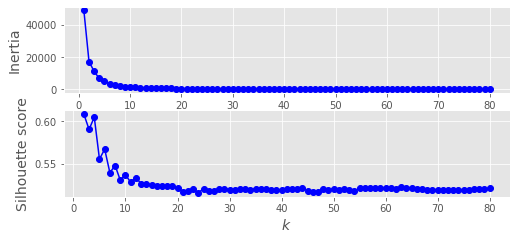

In [174]:
kmean_test_n_clusters(doc2vec_norm_pca, 80)

clusters done
inertias done
clusters done


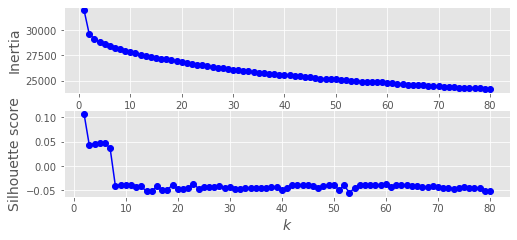

In [175]:
kmean_test_n_clusters(doc2vec_norm, 80)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


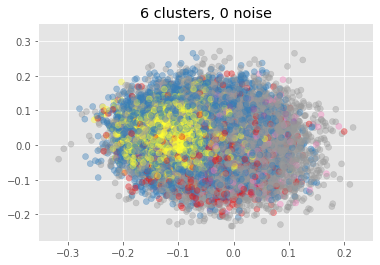

(6, 0)

In [267]:
cluster(doc2vec_norm, n_clusters = 6)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


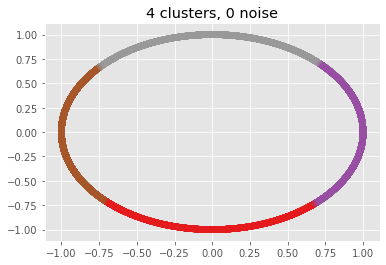

(4, 0)

In [268]:
cluster(doc2vec_norm_pca, n_clusters = 4)

In [274]:

post_event['KMeans_pca']


Wall time: 0 ns


Date Short
2020-09-08    1
2020-09-08    1
2020-09-08    1
2020-09-08    0
2020-09-08    0
             ..
2020-09-23    2
2020-09-23    2
2020-09-23    2
2020-09-23    2
2020-09-23    2
Name: KMeans_pca, Length: 49055, dtype: int32

In [187]:
def print_cluster_summary(algo, i):
    """
    Printing a small summary of the apps of a cluster. 
    
    Arguments: 
    algo -- the algorithm that was used for clustering (KMeans_topic or KMeans)
    i -- the label number of the target cluster
    
    Returns: 
    A printout containing : 
    -- the cluster label 
    -- the number of apps within the cluster
    -- the titles of the apps in the cluster 
    """
    #assert algo in ['DBSCAN', 'KMeans', 'DBSCAN_topics', 'KMeans_topics']
    
    cluster_df = post_event.copy()
    cluster_df = cluster_df[cluster_df[algo] ==  i]
    print('Cluster {} consists out of {} apps.'.format(str(i), str(cluster_df.shape[0])))
    titles = list(cluster_df['Tweet Clean Tokens'])
    print('The tweets are:\n {}'.format('\n\t'.join(titles)))

In [270]:
print_cluster_summary('KMeans_pca', 1)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [271]:
word_freq_per_cluster = post_event.groupby('KMeans_pca').agg(lambda x: nltk.FreqDist([w for wordlist in x for w in wordlist]))['Tweet Clean Tokens']

In [272]:
#print(word_freq_per_cluster)
for cluster in word_freq_per_cluster:
    print(len(cluster))
    #key_to_be_deleted = ['lesvos','lesbos','refugee','camp','moria','fire','greece','migrant','greek','island']
    for key in key_to_be_deleted:
        cluster.pop(key, None)
    print(cluster.most_common(15))

11947
[('people', 1841), ('country', 1041), ('take', 860), ('thousand', 823), ('asylum', 712), ('child', 691), ('europe', 658), ('left', 535), ('like', 527), ('turkey', 507), ('time', 453), ('shelter', 448), ('seeker', 444), ('burned', 436), ('government', 411)]
18624
[('people', 3712), ('europe', 2549), ('asylum', 2406), ('child', 1907), ('thousand', 1756), ('migration', 1657), ('refugeesgr', 1642), ('turkey', 1424), ('shelter', 1419), ('seeker', 1404), ('destroyed', 1367), ('take', 1356), ('need', 1339), ('european', 1300), ('government', 1267)]
19116
[('europe', 2319), ('thousand', 2015), ('people', 1965), ('police', 1958), ('asylum', 1851), ('take', 1800), ('germany', 1408), ('country', 1198), ('homeless', 1181), ('destroyed', 1115), ('seeker', 1076), ('child', 1075), ('largest', 1063), ('migration', 1041), ('refugeesgr', 965)]
10064
[('moriacamp', 1600), ('europe', 1356), ('refugeesgr', 1107), ('people', 988), ('asylum', 852), ('thousand', 794), ('news', 788), ('largest', 673), ('

## LDA

In [124]:
import nltk
from nltk.tokenize import word_tokenize
from gensim.models import CoherenceModel
import gensim
import gensim.corpora as corpora
import pyLDAvis
import pyLDAvis.gensim

In [125]:
df_lda = post_event.copy()


def part_of_speech(text):
    """
    Keeps only the tokens which as tagged as nouns
    """
    temp = nltk.pos_tag(text)
    return [word for word, tag in temp if 
            (tag == "NN") or 
            (tag == "NNS") or
            (tag == "NNP") or 
            (tag == "NNPS")]

In [126]:
df_lda["Tweet Clean Tokens"] = df_lda["Tweet Clean Tokens"].apply(part_of_speech)

In [127]:
id2word = corpora.Dictionary(df_lda["Tweet Clean Tokens"])
print(len(id2word))

22708


In [128]:
id2word.filter_extremes(no_below=5, no_above=0.5)
print(len(id2word))

corpus = [id2word.doc2bow(sent) for sent in df_lda["Tweet Clean Tokens"]]

5326


In [130]:
def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (- %s)' % (asMinutes(s), asMinutes(rs))

In [140]:
import time

def coherence_plot(corpus=corpus, texts=df_lda["Tweet Clean Tokens"], dictionary=id2word, start = 2, stop=100):
    coherence_scores = [] 
    num_of_topics = []
    time_start = time.time()
    for i in range(start, stop+1):
        print(f"Iter for {i} topics running")
        lda_model_temp = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=i,
                                               alpha="auto",
                                               eta="auto",
                                               random_state=42)
        coherence_model_lda = CoherenceModel(model=lda_model_temp, texts=df_lda["Tweet Clean Tokens"], dictionary=id2word, coherence='c_v')
        coherence_score = coherence_model_lda.get_coherence()
        num_of_topics.append(i)
        coherence_scores.append(coherence_score)
        print('%s (%d %d%%)' % (timeSince(time_start, i / (stop+1)), i, i / (stop+1) * 100))
        
    plt.plot(num_of_topics, coherence_scores)
    plt.ylabel("Coherence Measure")
    plt.xlabel("Number of Topics")
    plt.show()  

Iter for 2 topics running
0m 20s (- 16m 57s) (2 1%)
Iter for 3 topics running
0m 45s (- 24m 40s) (3 2%)
Iter for 4 topics running
1m 37s (- 39m 15s) (4 3%)
Iter for 5 topics running
2m 7s (- 40m 51s) (5 4%)
Iter for 6 topics running
2m 33s (- 40m 38s) (6 5%)
Iter for 7 topics running
3m 2s (- 40m 47s) (7 6%)
Iter for 8 topics running
3m 28s (- 40m 26s) (8 7%)
Iter for 9 topics running
3m 56s (- 40m 17s) (9 8%)
Iter for 10 topics running
4m 31s (- 41m 8s) (10 9%)
Iter for 11 topics running
5m 1s (- 41m 4s) (11 10%)
Iter for 12 topics running
5m 27s (- 40m 30s) (12 11%)
Iter for 13 topics running
5m 53s (- 39m 54s) (13 12%)
Iter for 14 topics running
6m 18s (- 39m 15s) (14 13%)
Iter for 15 topics running
6m 47s (- 38m 57s) (15 14%)
Iter for 16 topics running
7m 14s (- 38m 28s) (16 15%)
Iter for 17 topics running
7m 41s (- 38m 1s) (17 16%)
Iter for 18 topics running
8m 10s (- 37m 39s) (18 17%)
Iter for 19 topics running
8m 37s (- 37m 11s) (19 18%)
Iter for 20 topics running
9m 4s (- 36m 4

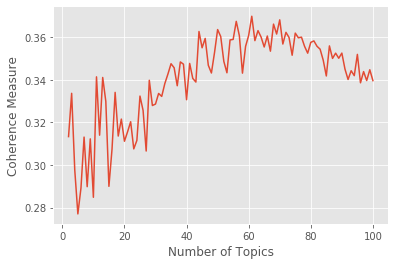

In [141]:
coherence_plot()

Iter for 58 topics running
0m 33s (- 0m 2s) (58 92%)
Iter for 59 topics running
1m 7s (- 0m 4s) (59 93%)
Iter for 60 topics running
1m 42s (- 0m 5s) (60 95%)
Iter for 61 topics running
2m 18s (- 0m 4s) (61 96%)
Iter for 62 topics running
2m 55s (- 0m 2s) (62 98%)


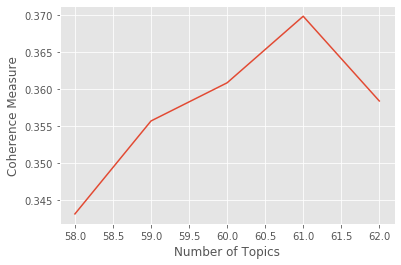

In [142]:
coherence_plot(start=58,stop=62)

In [285]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=4,
                                            alpha="auto",
                                            eta="auto",
                                            random_state=42)

In [286]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.040638 -0.198347       1        1  47.023621
3     -0.099134 -0.046194       2        1  21.682463
0     -0.156315  0.187986       3        1  20.915888
2      0.296087  0.056555       4        1  10.378029, topic_info=          Term          Freq         Total Category  logprob  loglift
25      lesbos  13024.000000  13024.000000  Default  30.0000  30.0000
27   migration   5616.000000   5616.000000  Default  29.0000  29.0000
72      asylum   6122.000000   6122.000000  Default  28.0000  28.0000
22        camp  24796.000000  24796.000000  Default  27.0000  27.0000
106     seeker   3477.000000   3477.000000  Default  26.0000  26.0000
..         ...           ...           ...      ...      ...      ...
1       greece    809.809570  21147.945312   Topic4  -4.0868  -0.9970
22        camp    747.675720  24796.031250   Topic4  -4.1667  -1.2360
6      refugee    501.590607  22001.726562   Topic4  -4.5658  -1.5156
25      lesbos    382.928406  13024.065430   Topic4  -4.8358  -1.2612
26     migrant    346.071869  10512.958008   Topic4  -4.9370  -1.1482

[305 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
402       2  0.003170  absolute
402       4  0.992120  absolute
221       1  0.100698    access
221       2  0.899568    access
403       1  0.248033    action
...     ...       ...       ...
384       4  0.014764      work
1390      2  0.993121      york
613       1  0.997762   youtube
613       4  0.002458   youtube
541       2  0.990989      zone

[549 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 1, 3])

In [148]:
def top_word_vis(lda_model, num_topics, num_words, items_per_row):
    """
    Input:
    - lda_model: the LDA model to feed in
    - num_topics: number of topics to show
    - num_words: top n words to show in graph
    - items_per_row: how many topics to show in a row
    Output:
    - Graph with top n words of each topic
    """
    iters = len(lda_model.show_topics(num_topics=num_topics))
    fig, axs = plt.subplots(math.floor(iters/items_per_row)+1, items_per_row, figsize=(15,(math.floor(iters/items_per_row)+1)*3))
    for i in range(iters):
        temp  = [elem.split('*') for elem in lda_model.show_topics(num_words=num_words, num_topics=num_topics)[i][1]
                 .replace('"', '').replace('+ ', '').split(" ")]
        nums = [float(i[0]) for i in temp]
        nums = nums[::-1]
        labels = [i[1] for i in temp]
        labels = labels[::-1]
        #plt.barh(y_pos, height)
        axs[math.floor(i/items_per_row)][i%items_per_row].barh(labels, nums)
        axs[math.floor(i/items_per_row)][i%items_per_row].set_title('Topic {}'.format(i))
    fig.tight_layout(pad=1.5)

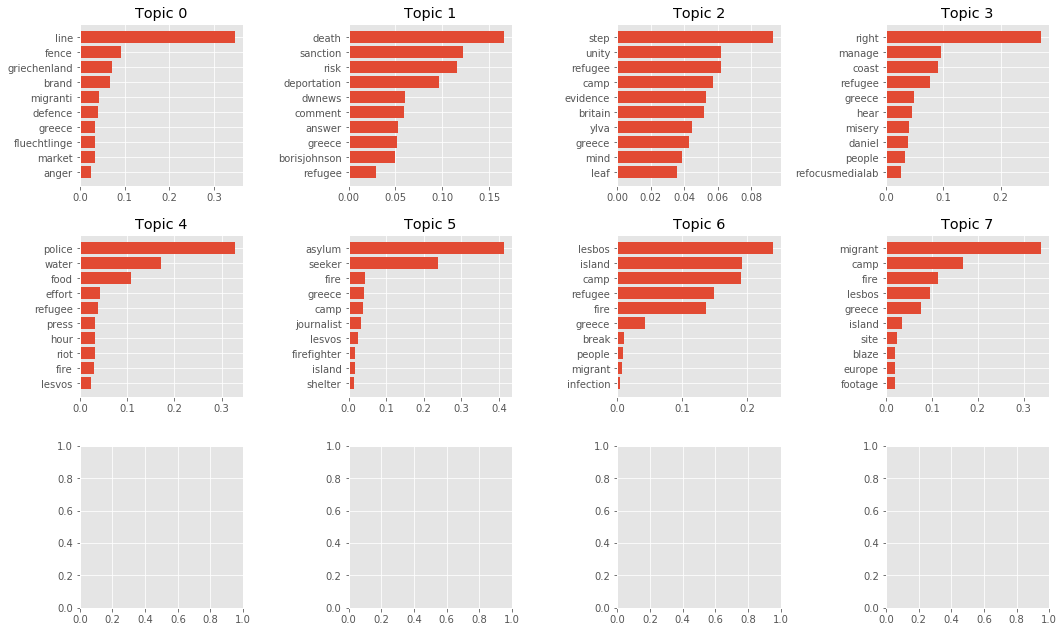

In [276]:
top_word_vis(lda_model, num_topics=8, num_words=10, items_per_row=4)

In [287]:
df_doc2top = pd.DataFrame([[j[1] for j in i] for i in lda_model.get_document_topics(corpus, minimum_probability=0.0)])

In [288]:
df_doc2top.set_index(df_lda.index, inplace=True)

In [291]:
doc2top = df_doc2top.values

doc2top.shape

(49055, 4)

In [ ]:
doc2top_norm = normalize(doc2top, axis=1)